In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.integrate as intgr

#Monkeypatch to fix heprops
from scipy.special import factorial
np.math = type('math', (), {})()
np.math.factorial = factorial

from heprops import helium as hel

In [4]:
plt.style.use('aps')
mpl.rcParams["figure.figsize"] = [3.4039, 2.10373]

In [5]:
f2 = open('../data/pimc/CsR8/estimator-u-reduce.dat','r')
lines = f2.readlines()
u = np.array([])
N = np.array([])
N2 = np.array([])
rho = np.array([])
delN = np.array([])
for line in lines[1:]:
    p = line.split()
    u = np.append(u,float(p[0]))
    N = np.append(N,float(p[19]))
    N2 = np.append(N2, float(p[21]))
    rho = np.append(rho, float(p[23]))
    delN = np.append(delN,float(p[20]))
f2.close()
ind = np.argsort(u)
uCs = u[ind]
N = N[ind]
N2 = N2[ind]
rho = rho[ind]
delN = delN[ind]
kCs = np.divide((N2 - N**2),N**2)
kCs = kCs/(2)
kCs = kCs/max(kCs)
#print(kCs)
PCs = hel.pressure(uCs,2)
PCsmax = max(PCs)
PCsmin = min(PCs)
PCsPlot = (PCs - PCsmin)/PCsmax
#u = np.delete(u,4)
#k = np.delete(k,4)
f2 = open('../data/pimc/ArR8/estimator-u-reduce.dat','r')
lines = f2.readlines()
u = np.array([])
N = np.array([])
N2 = np.array([])
rho = np.array([])
delN = np.array([])
for line in lines[1:]:
    p = line.split()
    u = np.append(u,float(p[0]))
    N = np.append(N,float(p[19]))
    N2 = np.append(N2, float(p[21]))
    rho = np.append(rho, float(p[23]))
    delN = np.append(delN,float(p[20]))
f2.close()
ind = np.argsort(u)
uAr = u[ind]
uAr = np.delete(uAr,8)
N = N[ind]
N = np.delete(N,8)
#print(N)
N2 = N2[ind]
N2 = np.delete(N2,8)
#print(N2)
rho = rho[ind]
delN = delN[ind]
kAr = np.divide((N2 - N**2),N**2)
#print(N2[8] - N[8]**2)
kAr = kAr/(2)
kAr = kAr/max(kAr)
#print(kAr)
PAr = hel.pressure(uAr,2)
PArmax = max(PAr)
PArmin = min(PAr)
PArPlot = (PAr - PArmin)/PArmax
print(PArPlot)
#print(max(PArPlot))

f2 = open('../data/pimc/MgR8/estimator-u-reduce.dat','r')
lines = f2.readlines()
u = np.array([])
N = np.array([])
N2 = np.array([])
rho = np.array([])
delN = np.array([])
for line in lines[1:]:
    p = line.split()
    u = np.append(u,float(p[0]))
    N = np.append(N,float(p[19]))
    N2 = np.append(N2, float(p[21]))
    rho = np.append(rho, float(p[23]))
    delN = np.append(delN,float(p[20]))
f2.close()
ind = np.argsort(u)
uMg = u[ind]
N = N[ind]
N2 = N2[ind]
rho = rho[ind]
delN = delN[ind]
kMg = np.divide((N2 - N**2),N**2)
kMg = kMg/(2)
kMg = kMg/max(kMg)
PMg = hel.pressure(uMg,2)
PMgmax = max(PMg)
PMgmin = min(PMg)
PMgPlot = (PMg - PMgmin)/PMgmax

[0.00000000e+00 2.46178884e-18 3.24525165e-17 3.97814376e-16
 4.84883302e-15 5.90733408e-14 1.60578367e-13 7.19663079e-13
 8.76729357e-12 2.38319752e-11 1.06807503e-10 4.78678022e-10
 1.30118177e-09 3.53697878e-09 1.58516396e-08 7.10421280e-08
 1.93112575e-07 5.24934770e-07 2.35260347e-06 6.39509362e-06
 2.86621632e-05 7.79199063e-05 3.49411971e-04 9.50997735e-04
 4.29163691e-03 1.18436067e-02 5.74665676e-02 3.45666652e-01
 6.91226865e-01 1.00000000e+00]


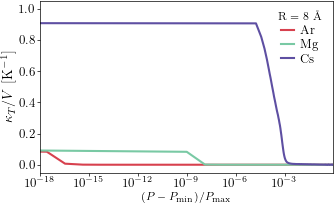

In [6]:
with plt.style.context('aps'):
    figsize = plt.rcParams['figure.figsize']
    fig,ax = plt.subplots(figsize=(figsize[0],figsize[1]), constrained_layout=True)
    ax.semilogx(PArPlot,kAr,label=r'Ar',color='#D7414E')
    ax.semilogx(PMgPlot,kMg,label=r'Mg',color='#79C9A4')
    ax.semilogx(PCsPlot,kCs,label=r'Cs',color='#5E4FA2')
    ax.set_ylabel(r'$\kappa_T/V \text{ } [\rm K^{-1}]$',fontsize=10)
    ax.set_xlabel(r'$(P - P_{\rm min})/P_{\rm max}$')
    ax.set_xlim(1e-18,0.9)
    plt.legend(title="R = 8 Å",handlelength=1)
    #plt.show()
    plt.savefig('../figures/KvsPR8.pdf')